# 5.Naive Bayes:

- Classification algorithem based on Bayes' theorem, which is used for categorizing data into predefined classes or categories.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
student_d=pd.read_csv("student_data.csv") # loading file from computer
student_d.sample(10)
 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
244,male,group D,some high school,standard,none,75,74,69
496,female,group C,some college,standard,none,54,48,52
287,female,group B,some high school,standard,none,67,89,82
548,female,group C,high school,free/reduced,none,62,67,64
764,male,group D,some college,standard,none,60,63,59
684,male,group B,some college,standard,completed,62,66,68
611,female,group C,some college,standard,none,58,59,66
718,female,group C,high school,standard,none,76,76,74
876,male,group D,some college,standard,none,81,82,84
308,female,group B,associate's degree,free/reduced,none,53,71,67


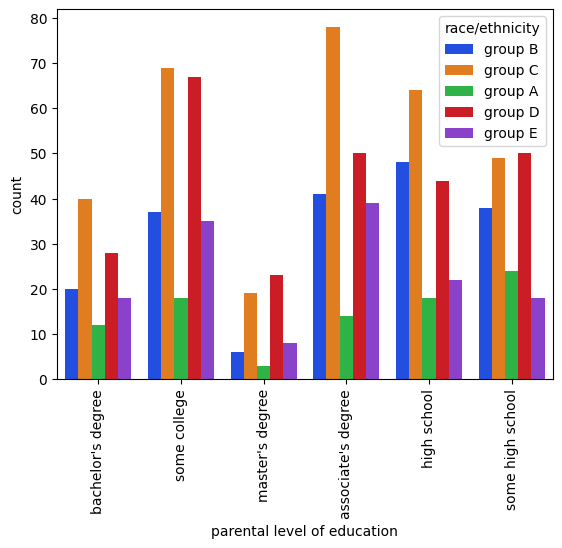

In [12]:
#Visualization
p = sns.countplot(x='parental level of education', data = student_d , hue='race/ethnicity', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [13]:
student_d = student_d.drop(['lunch'],axis=1)
student_d = student_d.drop(['parental level of education'],axis=1)
student_d = student_d.drop(['gender'],axis=1)
student_d = student_d.drop(['test preparation course'],axis=1)
student_d.sample(10)

,race/ethnicity,math score,reading score,writing score
726,group E,65,75,77
875,group C,80,64,66
403,group D,88,99,100
409,group D,87,84,85
446,group D,69,66,60
112,group A,54,53,47
605,group C,75,72,62
208,group B,74,81,76
307,group C,51,52,44
526,group C,56,61,60


In [14]:
x=student_d.drop(columns='race/ethnicity')
y=student_d['race/ethnicity']

In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

     group A       0.00      0.00      0.00        32
     group B       0.20      0.17      0.18        60
     group C       0.35      0.57      0.44        92
     group D       0.27      0.21      0.24        80
     group E       0.24      0.28      0.26        36

    accuracy                           0.30       300
   macro avg       0.21      0.24      0.22       300
weighted avg       0.25      0.30      0.26       300

Confusion Matrix:
 [[ 0 12 14  5  1]
 [ 0 10 29 14  7]
 [ 0 14 52 19  7]
 [ 0 10 37 17 16]
 [ 0  3 15  8 10]]


c:\Users\AAA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AAA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AAA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# The result for different groups A,B,C,D and E is given. precision, accuracy and f1 score for group A is zero. this result is quite similiar to random forest model result. There is slight change about other groups. 